In [1]:
import pandas as pd

posts_df = pd.read_csv('cleaned_posts.csv')

posts_df.head()

postID                                    originalContent  \
0  29104030                                          Vkl lu√¥n    
1  29104026  ƒê.·ªãt c·ª• th·∫±ng Kh·∫£i Tr·∫ßn h√¥ VNI s·∫≠p v·ªÅ 900 l·∫ßn ...   
2  29104024            TƒÉng 1 ph√°t b·∫±ng vn l√†m hai m·∫•y nƒÉm :))   
3  29104021                            M√° ƒë√°ng full ti·ªÅn...ƒëau   
4  29104019                                     Gap kh·ªßng long   

                            date link  sentiment  totalLikes  totalReplies  \
0  2024-11-06T21:39:23.267+07:00  NaN          0           1             0   
1   2024-11-06T21:39:05.22+07:00  NaN          0           0             0   
2  2024-11-06T21:39:04.077+07:00  NaN          0          12             2   
3  2024-11-06T21:38:52.277+07:00  NaN          0           0             1   
4   2024-11-06T21:38:49.99+07:00  NaN          0           2             0   

   replyToPostID                            taggedSymbols     username  \
0            NaN    [{'symb': '^DJI', 'price': 43496.43}]        Ho√†ng   
1            NaN                                       []      Datbg10   
2            NaN    [{'symb': '^DJI', 'price': 43506.86}]  Trung Tuy·∫øn   
3            NaN  [{'symb': 'VNINDEX', 'price': 1261.28}]   Duc Nguyen   
4            NaN    [{'symb': '^DJI', 'price': 43499.54}]     BINH NHI   

                                 userid  totalImages  totalSymbols  
0  5ededf24-12f7-41d9-b390-08ff631fc275            0             1  
1  73778567-ec61-43eb-b3a0-b4a651b8bd3f            0             0  
2  5d597f38-3b24-4f40-952c-2b3f9be8e7d5            0             1  
3  225659c6-cf18-4e93-aa39-a294bae5b784            1             1  
4  da8ebfa2-9cd5-4dbf-84cd-9567f694f681            0             1

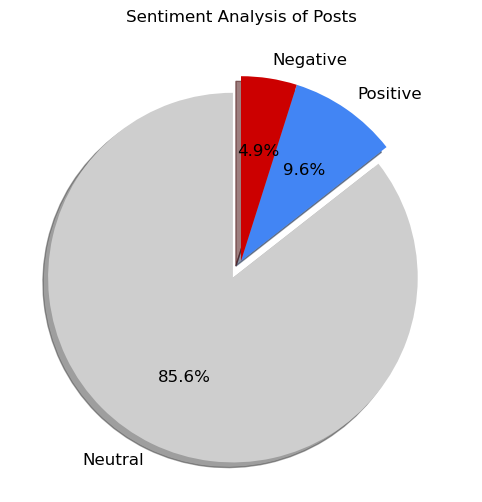

In [17]:
import  matplotlib.pyplot as plt
number_of_neutral_posts = posts_df['sentiment'].value_counts()[0]
nunmber_of_positive_posts = posts_df['sentiment'].value_counts()[1]
number_of_negative_posts = posts_df['sentiment'].value_counts()[-1]


# Labels and data
labels = ['Neutral', 'Positive', 'Negative']
colors = ['#cecece', '#4285f4', '#cc0000']
sizes = [number_of_neutral_posts, nunmber_of_positive_posts, number_of_negative_posts]

explode = (0.1, 0, 0)  # Explode the first slice (Negative)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12}  # Font size for labels
)
plt.title('Sentiment Analysis of Posts')
plt.show()

In [2]:
import string
stop_words = pd.read_csv('vietnamese-stopwords.csv')
stop_words = stop_words['word'].tolist()
stop_words = set(stop_words)

def preprocess_text_optimized(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join(word for word in text.split() if word not in stop_words)



In [3]:
post_content = posts_df[['username', 'userid','postID', 'originalContent', 'sentiment']]
# remove contents contains link only
post_content = post_content[~post_content['originalContent'].str.match(r'^\s*(http|https|www\.).*$', na=False)]
post_content.dropna(inplace=True)

post_content['originalContent'] = post_content['originalContent'].apply(preprocess_text_optimized)

In [4]:
cursed_words_list = pd.read_csv('Vietnamese_cursed_words.txt')
cursed_words_list = cursed_words_list['word'].tolist()

# remove space in the beginning and end of the word
cursed_words_list = [word.strip() for word in cursed_words_list]
cursed_words_list = set(cursed_words_list)
print(cursed_words_list)

{'dcmmmm', 'ch·∫øt', 'l√°o ch√≥', 'caiconcak', 'm·∫£ m·∫π', 'm·ªát m·ªèi', 'ch·∫øt mja', 'con d·ªùi', 'ke me', 'bo me', 'dell ch·ªãu', 'dell bi·∫øt', 't·ª©c gi·∫≠n', 'ƒëis m·ªãe', 'con ch√≥', 'gi·∫≠n d·ªØ', 'dell l√†m', 'ch·∫øt mie', 'dell nghe', 'dmm', 'ƒë·ªãt b√†', 'ƒëcm', 'c·∫∑k', 'dau buoi', 'c·∫∑c', 't·ªßi th√¢n', 'hoang mang', 'ch√°n', 'ƒë·ªß m√°', 'bitch', 'b·ªè m·ªãe', 'x√†m', 'dmconcho', 'concak', 'c·ª©k', 'dell biet', 'ƒëilon', 'vailol', 'cmn', 'ƒë·ªãt c·ª•', 'me cha may', 'dauboi', 'ma cha may', 'ƒë·ªát', 'dell ƒëi', 'ƒë√™ ma ma', 'c∆∞·ªùi ·ªâa', 'ƒë·ªãt b·ªë', 'ƒë·ª• m·ªãe', 'dis mia', 'dell hieu', 'ƒëiloz', 'dau boy', 'matloz', 'ƒë·∫ßu b√πi', 'b√≤i', 't·ªïn th∆∞∆°ng', 's·ª£', 'u·∫•t ·ª©c', 'ho·∫£ng lo·∫°n', 'm√† coi ƒëc √†', 'ke mja', 'ƒë·ª•', 'm·∫•t d·∫≠y', 'cu', 'caidaubuoi', 'ƒë·∫≠u m√°', 'l·ªìn', 'z√°i', 'ch·∫øt m·∫π', 'vailon', 'deohieukieugi', 'ƒë√π m√°', 's·ªßa b·∫≠y', 'ƒë√π m·ªãa', 'caiconcac', 'dellnoinhieu', 'dauboy', 'dismje', 'ch√≥ ƒëi√™n', 'kac', 'ch√≥ m√°', '

In [39]:
def count_cursed_words(text):
    count = 0
    text = preprocess_text_optimized(text)
    for word in text.split():
        if word in cursed_words_list:
            count += 1
    return count
post_content['cusred_words_count'] = post_content['originalContent'].apply(count_cursed_words)
post_content

username                                userid  \
0                               Ho√†ng  5ededf24-12f7-41d9-b390-08ff631fc275   
1                             Datbg10  73778567-ec61-43eb-b3a0-b4a651b8bd3f   
2                         Trung Tuy·∫øn  5d597f38-3b24-4f40-952c-2b3f9be8e7d5   
3                          Duc Nguyen  225659c6-cf18-4e93-aa39-a294bae5b784   
4                            BINH NHI  da8ebfa2-9cd5-4dbf-84cd-9567f694f681   
...                               ...                                   ...   
272974                            NTH  eed1b1ff-a87b-43a8-acf3-60605631cd8e   
272975                       Xu√¢n Ph√∫  69659543-c04f-4f3d-9b7b-2543d3f4e4a7   
272976                        H·ªì ƒê·ªìng  8087c7d2-960f-4160-b0c0-4dc782d02a12   
272977              Di·ªát Chim L·ª£n Ch√≥  f2133134-296f-4572-90fc-6cb4a81cf7d6   
272978  VNINDEX S√íNG B·∫†C C·∫§P QU·ªêC GIA  10e5f0c7-909f-438f-9d74-f85cf881a5f4   

          postID                            originalContent  sentiment  \
0       29104030                                        vkl          0   
1       29104026  ƒë·ªãt c·ª• th·∫±ng kh·∫£i tr·∫ßn h√¥ vni s·∫≠p 900 100          0   
2       29104024                              1 ph√°t vn hai          0   
3       29104021                            m√° full ti·ªÅnƒëau          0   
4       29104019                             gap kh·ªßng long          0   
...          ...                                        ...        ...   
272974  28008015                                         vc          0   
272975  28008013                      ch·∫øt d·∫≠p ch·∫øt d·ª•i hic          0   
272976  28008006                                m√∫c r≈© ƒë·ªânh          0   
272977  28008001           ƒë·ª´ng mong r·∫ª n√≠ ƒë·ªè xanh b√°n line          0   
272978  28007995                            600 kia k√¨a d·ªùi          0   

        cusred_words_count  has_cursed_words  
0                        1              True  
1                        1              True  
2                        0             False  
3                        0             False  
4                        0             False  
...                    ...               ...  
272974                   0             False  
272975                   2              True  
272976                   0             False  
272977                   0             False  
272978                   0             False  

[271921 rows x 7 columns]

In [40]:
post_content['cusred_words_count'].value_counts()

cusred_words_count
0     238624
1      26289
2       4907
3       1279
4        437
5        174
6         98
7         55
8         20
9         11
11         7
10         7
12         6
13         2
14         2
15         2
19         1
Name: count, dtype: int64

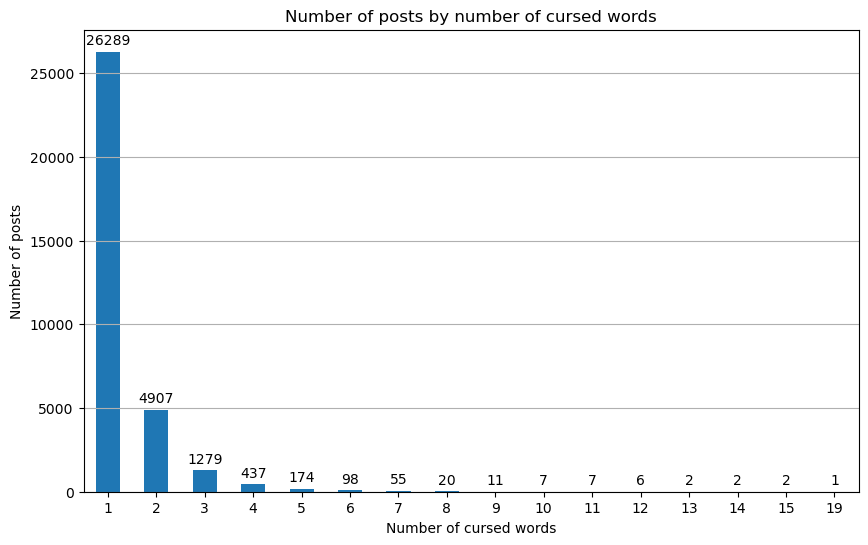

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = post_content.loc[post_content['cusred_words_count'] != 0, 'cusred_words_count'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of cursed words')
plt.ylabel('Number of posts')
plt.title('Number of posts by number of cursed words')

# add number on top of each columns
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


In [42]:
# draw a pie chart showing the percentage of posts containing cursed words(positive posts, negative posts, neutral posts)
post_content['has_cursed_words'] = post_content['cusred_words_count'] > 0
post_content['sentiment'] = post_content['sentiment'].fillna(0)


total_cursed_words_posts = post_content['has_cursed_words'].sum()
total_cursed_words_posts


33297

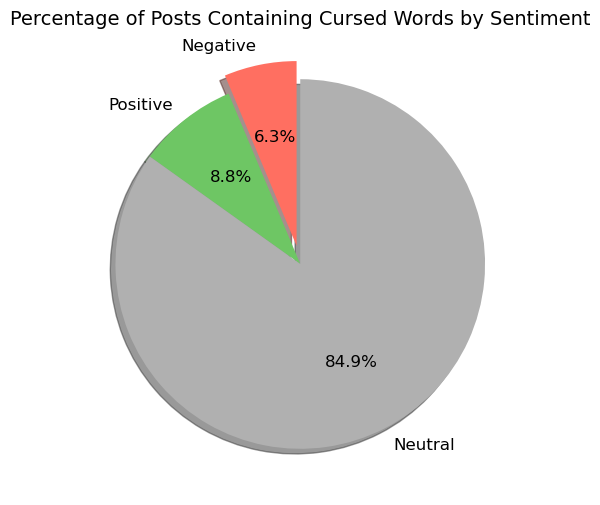

In [43]:
import matplotlib.pyplot as plt

# Data
negative_cursed_posts = post_content[post_content['sentiment'] == -1]['has_cursed_words'].sum()
positive_cursed_posts = post_content[post_content['sentiment'] == 1]['has_cursed_words'].sum()
neutral_cursed_posts = post_content[post_content['sentiment'] == 0]['has_cursed_words'].sum()

# Labels and data
labels = ['Negative', 'Positive', 'Neutral']
sizes = [negative_cursed_posts, positive_cursed_posts, neutral_cursed_posts]
colors = ['#FF6F61', '#6EC664', '#B0B0B0']  # Red, green, gray
explode = (0.1, 0, 0)  # Explode the first slice (Negative)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12},  # Font size for labels
)
plt.title('Percentage of Posts Containing Cursed Words by Sentiment', fontsize=14)
plt.show()


In [44]:
user_activity = post_content.groupby('userid').agg(
    user_name = ('username', 'first'),
    total_posts=('postID', 'count'),
    total_cursed_posts=('has_cursed_words', 'sum'),
    total_negative_posts=('sentiment', lambda x: (x == -1).sum()),
    total_positive_posts=('sentiment', lambda x: (x == 1).sum()),
    total_neutral_posts=('sentiment', lambda x: (x == 0).sum())
).reset_index()
user_activity

userid          user_name  total_posts  \
0      0001a16a-5b22-452b-9d3a-8bdeb5bb7b6e      BUFFALO SUPER           12   
1      00029205-5720-49ed-9228-0c697188c706             123go!            6   
2      0004aa83-f758-40a0-84a7-09722f8ef181        Tr·∫ßn Th·ªß ƒê·ªô            5   
3      000bf1ef-f711-43f7-a5ad-df9bee5d3530          linh th·∫£o            1   
4      000fb89b-2583-4b9c-b6c7-d80bf0434a8b        C√° Voi Xanh            4   
...                                     ...                ...          ...   
22535  fff1cb24-3b8c-4833-9a22-1117ef6f696c     C·∫Øt L·ªó B·∫Øt ƒê√°y            1   
22536  fff1f776-006d-40c7-8617-16c2c1f9aad3            T·∫° Long            2   
22537  fffbd3d5-840a-4dff-b109-21a464fcd007  B√°n ch·∫≠m-Mua ch·∫≠m            3   
22538  fffd4ccd-3481-48d6-a641-21ded4843d9b  mua ƒë√°y b√°n ƒë·ªânh            17   
22539  ffffb919-7497-437e-ba75-d45e681bd55b         S√≥i C√¥ ƒê·ªôc            2   

       total_cursed_posts  total_negative_posts  total_positive_posts  \
0                       3                    10                     0   
1                       0                     0                     0   
2                       1                     0                     0   
3                       1                     0                     0   
4                       0                     0                     0   
...                   ...                   ...                   ...   
22535                   0                     0                     0   
22536                   1                     0                     0   
22537                   0                     0                     0   
22538                   4                     0                     0   
22539                   1                     0                     0   

       total_neutral_posts  
0                        2  
1                        6  
2                        5  
3                        1  
4                        4  
...                    ...  
22535                    1  
22536                    2  
22537                    3  
22538                   17  
22539                    2  

[22540 rows x 7 columns]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\306380525.py:20: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\306380525.py:20: UserWarning: Glyph 128405 (\N{REVERSED HAND WITH MIDDLE FINGER EXTENDED}) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128405 (\N{REVERSED HAND WITH MIDDLE FINGER EXTENDED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


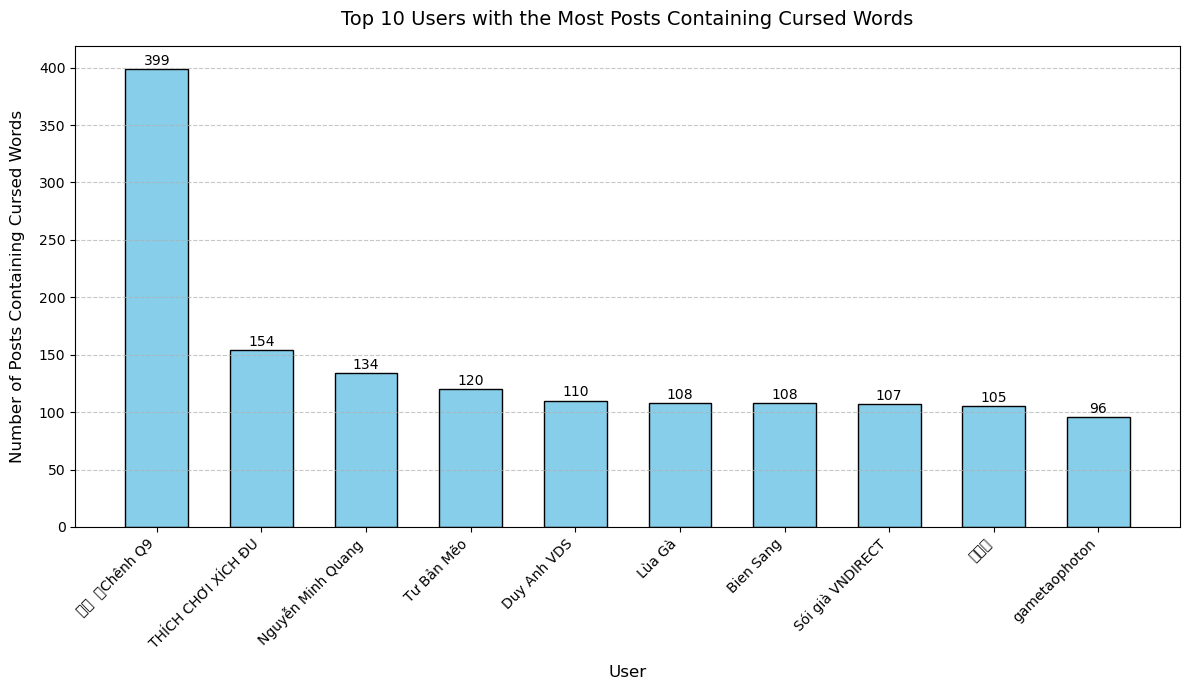

In [45]:
import matplotlib.pyplot as plt

# Sort the data and select the top 10 users
top_users = user_activity.sort_values('total_cursed_posts', ascending=False).head(10)
# Plot
plt.figure(figsize=(12, 7))
bars = plt.bar(top_users['user_name'],top_users['total_cursed_posts'],color='skyblue',edgecolor='black',width=0.6,)
# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{int(bar.get_height())}",  ha='center', va='bottom', fontsize=10,)
# Customize axes and title
plt.xlabel('User', fontsize=12, labelpad=10)
plt.ylabel('Number of Posts Containing Cursed Words', fontsize=12, labelpad=10)
plt.title('Top 10 Users with the Most Posts Containing Cursed Words', fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate user names for readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines for clarity

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [46]:
print(top_users['user_name'].tolist())

['   „Ö§„Ö§  „Ö§Ch√™nh Q9', 'TH√çCH CH∆†I X√çCH ƒêU', 'Nguy·ªÖn Minh Quang', 'T∆∞ B·∫£n M·∫Ωo', 'Duy Anh VDS', 'L√πa G√†', 'Bien Sang', 'S√≥i gi√† VNDIRECT', 'üñïüñïüñï', 'gametaophoton']


In [47]:
replies_df = pd.read_csv('cleaned_replies.csv')
print(len(replies_df))

75510


In [48]:
replies_content = replies_df[['username', 'userid', 'postID', 'originalContent']]
replies_content

username                                userid    postID  \
0                  NDC  028e4d25-5631-4f3f-8f72-235eabaef9ba  29100636   
1                Alex   d0a457ea-b787-4263-bdd1-0e8d0bfc63d9  29100614   
2      Upgrading to Fo  3cc4dffe-ac35-4ac8-95d8-6eb677353d5d  29100602   
3                  NDC  028e4d25-5631-4f3f-8f72-235eabaef9ba  29100595   
4             T√πng C·∫≠n  2b323870-af46-471a-aee7-bd28a23990e2  29100584   
...                ...                                   ...       ...   
75505        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005671   
75506        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005666   
75507        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005646   
75508        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005631   
75509        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005623   

                                         originalContent  
0      B√°c c√≥ th·ªÉ ƒë∆∞a ra k·ªãch b·∫£n r·∫±ng : H·ªç sai!\nS·ªë ...  
1      Sao s·ªë li·ªáu t·ª± doanh m·ªói n∆°i m·ªói kh√°c nh·ªâ, nay...  
2      hi·ªán basic c·∫°n c·∫£ cung c·∫£ c·∫ßu. Nn tho√°t basic ...  
3                          :)) b√°c l·∫°i chu·∫©n b√†i qu√° ƒë√≥.  
4      r√µ r√†ng ph·∫£i c√≥ ch·ªØ N·∫æU, l·ª° ko ƒëc c√≤n c√≥ c√°i m...  
...                                                  ...  
75505                  ‚òéLh ƒë·∫ßu t∆∞ SƒêT/Zalo: 0934 318 921  
75506       A.C tham gia c·ªông ƒë·ªìng L∆∞·ª£ng VPAüïä ·ªü ƒë√¢y nh√©üëá  
75507  3‚Ä¢\tKhuy·∫øn ngh·ªã\nB√ÅN CH·ªêT L·ªúI v√† QU·∫¢N TR·ªä R·ª¶I ...  
75508  2. ‚Ä¢\tKhuy·∫øn ngh·ªã\nB√ÅN CH·ªêT L·ªúI FTS\nGi√° b√°n :...  
75509  1. ‚Ä¢\tKhuy·∫øn ngh·ªã\nB√ÅN CH·ªêT L·ªúI FPT\nGi√° b√°n :...  

[75510 rows x 4 columns]

In [49]:
replies_content = replies_content[~replies_content['originalContent'].str.match(r'^\s*(http|https|www\.).*$', na=False)]
replies_content['originalContent'] = replies_content['originalContent'].apply(preprocess_text_optimized)
replies_content['cusred_words_count'] = replies_content['originalContent'].apply(count_cursed_words)    
replies_content['has_cursed_words'] = replies_content['cusred_words_count'] > 0
replies_content

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\3901651923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies_content['originalContent'] = replies_content['originalContent'].apply(preprocess_text_optimized)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\3901651923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies_content['cusred_words_count'] = replies_content['originalContent'].apply(count_cursed_words)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\3901651923.py:4: SettingWithCo

username                                userid    postID  \
0                  NDC  028e4d25-5631-4f3f-8f72-235eabaef9ba  29100636   
1                Alex   d0a457ea-b787-4263-bdd1-0e8d0bfc63d9  29100614   
2      Upgrading to Fo  3cc4dffe-ac35-4ac8-95d8-6eb677353d5d  29100602   
3                  NDC  028e4d25-5631-4f3f-8f72-235eabaef9ba  29100595   
4             T√πng C·∫≠n  2b323870-af46-471a-aee7-bd28a23990e2  29100584   
...                ...                                   ...       ...   
75505        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005671   
75506        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005666   
75507        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005646   
75508        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005631   
75509        L∆∞·ª£ng VPA  d18efa81-cdae-4b02-96c8-9dc7eeb85789  28005623   

                                         originalContent  cusred_words_count  \
0                         th·ªÉ k·ªãch sai li·ªáu s·ªü giao d·ªãch                   0   
1                             li·ªáu doanh th·ªëng k√™ td l s                   0   
2      hi·ªán basic c·∫°n cung c·∫ßu nn tho√°t basic r√≤ng r·∫£...                   2   
3                                                  chu·∫©n                   0   
4                                 r√†ng ch·ªØ l·ª° ƒëc ƒë·ªï th·ª´a                   0   
...                                                  ...                 ...   
75505                    ‚òélh ƒë·∫ßu t∆∞ sƒëtzalo 0934 318 921                   0   
75506                    ac tham gia c·ªông ƒë·ªìng vpaüïä nh√©üëá                   0   
75507  3‚Ä¢ khuy·∫øn ngh·ªã b√°n ch·ªët qu·∫£n tr·ªã r·ªßi ro dcm b√°...                   0   
75508  2 ‚Ä¢ khuy·∫øn ngh·ªã b√°n ch·ªët fts b√°n quanh m·ªëc 434...                   0   
75509  1 ‚Ä¢ khuy·∫øn ngh·ªã b√°n ch·ªët fpt b√°n quanh m·ªëc 130...                   0   

       has_cursed_words  
0                 False  
1                 False  
2                  True  
3                 False  
4                 False  
...                 ...  
75505             False  
75506             False  
75507             False  
75508             False  
75509             False  

[75456 rows x 6 columns]

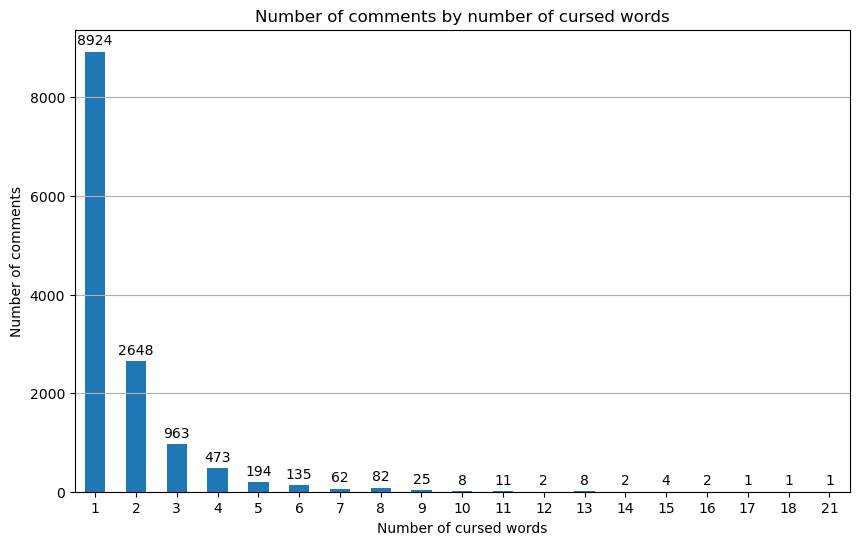

In [50]:
plt.figure(figsize=(10, 6))
bars = replies_content.loc[replies_content['cusred_words_count'] != 0, 'cusred_words_count'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of cursed words')
plt.ylabel('Number of comments')
plt.title('Number of comments by number of cursed words')

# add number on top of each columns
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


In [51]:
user_replies_activity = replies_content.groupby('userid').agg(
    user_name = ('username', 'first'),
    total_replies=('postID', 'count'),
    total_cursed_replies=('has_cursed_words', 'sum')
).reset_index()

# Sort the data and select the top 10 users
top_users_replies = user_replies_activity.sort_values('total_cursed_replies', ascending=False).head(10)
top_users_replies

userid  \
7144  d64c98b5-0ba7-4f55-885b-97ee082d1a64   
3632  6b946f8e-6687-4882-a583-f08fb494b184   
6988  d1385782-3002-4506-be1d-4fcfc66bff58   
4054  788e65f8-c534-4d90-84b4-17065408919c   
4306  7f027f11-5122-4fdc-b136-07253c5a617e   
109   03390697-0463-4396-bd8a-1ce6f2710193   
4232  7d07fbd1-8ffa-4b47-bbe5-1545a58aaafb   
5486  a16d23ca-6a2d-45c4-8a2d-35a16c6fc537   
2870  557ac2ff-814c-49a0-a453-78728ae68859   
4407  82754ad3-bf9a-40e6-9afa-c4b47e592b15   

                                  user_name  total_replies  \
7144                          „Ö§„Ö§  „Ö§Ch√™nh Q9            660   
3632                        Nhang Nh·ªì Nh·∫°ng            290   
6988                                H·ªØu Nam            423   
4054                         Chim L·ª£n Ch√∫a             211   
4306                      HuyHoang(Big boy)            151   
109                BITCOIN 600K$ (M·∫†C DANH)            270   
4232  Hi·ªáu Qu·∫£ ƒê·∫ßu T∆∞ 28,9% T·ª´ ƒê·∫ßu NƒÉm :)))            222   
5486                                  DADDY            223   
2870                      S√≤ng B·∫°c H·ª£p Ph√°p            142   
4407                                H·ªìi K·∫øt            184   

      total_cursed_replies  
7144                   390  
3632                   206  
6988                   131  
4054                   117  
4306                   117  
109                    116  
4232                   109  
5486                    90  
2870                    89  
4407                    82

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\2694880987.py:13: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


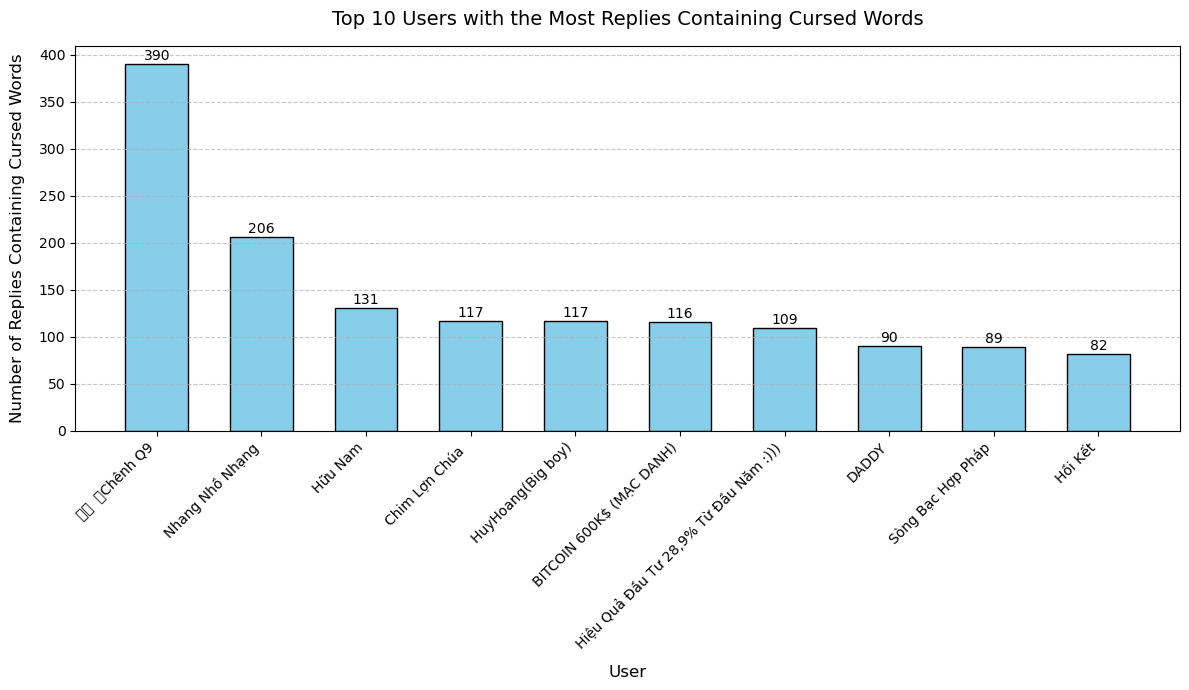

In [52]:
plt.figure(figsize=(12, 7))
bars = plt.bar(top_users_replies['user_name'],top_users_replies['total_cursed_replies'],color='skyblue',edgecolor='black',width=0.6,)
# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  f"{int(bar.get_height())}",  ha='center',  va='bottom',  fontsize=10,)
# Customize axes and title
plt.xlabel('User', fontsize=12, labelpad=10)
plt.ylabel('Number of Replies Containing Cursed Words', fontsize=12, labelpad=10)
plt.title('Top 10 Users with the Most Replies Containing Cursed Words', fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate user names for readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines for clarity
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

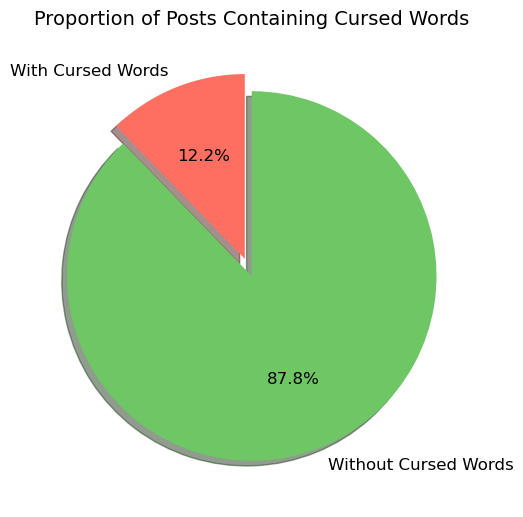

In [53]:
import matplotlib.pyplot as plt

# Data
posts_with_curses = post_content['has_cursed_words'].sum()
posts_without_curses = len(post_content) - posts_with_curses

# Labels and data
labels = ['With Cursed Words', 'Without Cursed Words']
sizes = [posts_with_curses, posts_without_curses]
colors = ['#FF6F61', '#6EC664']  # Red for cursed, green for not cursed

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages with 1 decimal
    startangle=90,  # Start from the top
    colors=colors,
    textprops={'fontsize': 12},  # Label font size
    explode=(0.1, 0),  # Slightly explode the "With Cursed Words" slice
    shadow=True,
)
plt.title('Proportion of Posts Containing Cursed Words', fontsize=14, pad=15)
plt.show()


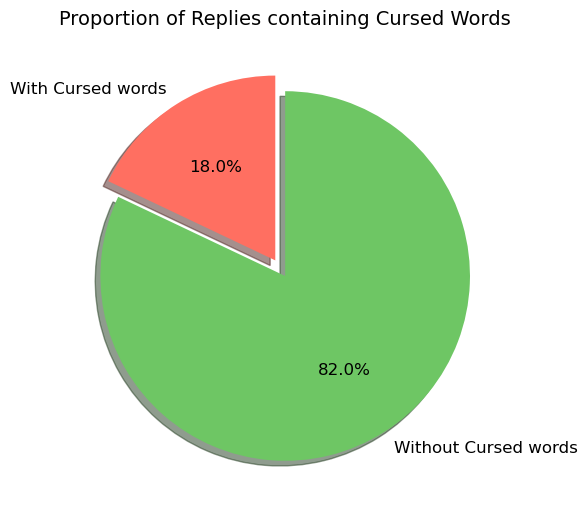

In [54]:
import matplotlib.pyplot as plt

# Data
posts_with_curses = replies_content['has_cursed_words'].sum()
posts_without_curses = len(replies_content) - posts_with_curses

# Labels and data
labels = ['With Cursed words', 'Without Cursed words']
sizes = [posts_with_curses, posts_without_curses]
colors = ['#FF6F61', '#6EC664']  # Red for cursed, green for not cursed

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages with 1 decimal
    startangle=90,  # Start from the top
    colors=colors,
    textprops={'fontsize': 12},  # Label font size
    explode=(0.1, 0),  # Slightly explode the "With Cursed Words" slice
    shadow=True,
)
plt.title('Proportion of Replies containing Cursed Words', fontsize=14, pad=15)
plt.show()


In [55]:
print(top_users_replies['user_name'].tolist())

['   „Ö§„Ö§  „Ö§Ch√™nh Q9', 'Nhang Nh·ªì Nh·∫°ng', 'H·ªØu Nam', 'Chim L·ª£n Ch√∫a ', 'HuyHoang(Big boy)', 'BITCOIN 600K$ (M·∫†C DANH)', 'Hi·ªáu Qu·∫£ ƒê·∫ßu T∆∞ 28,9% T·ª´ ƒê·∫ßu NƒÉm :)))', 'DADDY', 'S√≤ng B·∫°c H·ª£p Ph√°p', 'H·ªìi K·∫øt']


In [56]:
# users with highest ratio of posts containing cursed words(atleast 50 posts)
user_activity['cursed_posts_ratio'] = user_activity['total_cursed_posts'] / user_activity['total_posts']
user_activity['cursed_posts_ratio'] = user_activity['cursed_posts_ratio'].fillna(0)
user_activity['total_posts'] = user_activity['total_posts'].fillna(0)
top_user_activity = user_activity[user_activity['total_posts'] >= 100]
top_users_ratio = top_user_activity.sort_values('cursed_posts_ratio', ascending=False).head(10)
top_users_ratio


userid               user_name  \
1860   14e537c2-5539-40d4-a3a0-fab9f41b1d6c               Shan Shan   
18887  d64c98b5-0ba7-4f55-885b-97ee082d1a64           „Ö§„Ö§  „Ö§Ch√™nh Q9   
11050  7bc590e1-38f5-4573-b518-f4500e31a875                  L√πa G√†   
1471   10789b61-001c-4a54-8b48-4cbe4c90e40a        S√≥i gi√† VNDIRECT   
1270   0e204d8f-1833-46ed-bf37-8b4e9a39e0af            C∆∞·ªùng Nguy·ªÖn   
8530   5f4d7091-fe7e-45c6-8f9e-18fdf310b837           Th·ª£ SƒÉn Ch·ª©ng   
13677  9a4cce67-b359-4759-b57b-bbf9c6ce9a27  Chi·∫øn th·∫ßn ch·ª©ng kho√°n   
5442   3cc3245e-7f08-45e6-913d-e2a94e3b7257             Nguyen Tuan   
10617  77275214-5160-483a-9511-5bb4fc9ab661          Ph·∫°m Trung Huy   
3585   27f6b09c-4a9e-46ec-822f-e8d4334eff64         Xu√¢n Vinh C∆° S·ªü   

       total_posts  total_cursed_posts  total_negative_posts  \
1860           111                  92                     0   
18887          618                 399                    80   
11050          183                 108                     0   
1471           211                 107                     0   
1270           117                  57                     0   
8530           101                  48                     0   
13677          138                  60                     0   
5442           132                  54                     0   
10617          114                  46                     0   
3585           102                  40                     1   

       total_positive_posts  total_neutral_posts  cursed_posts_ratio  
1860                      0                  111            0.828829  
18887                    89                  449            0.645631  
11050                     0                  183            0.590164  
1471                    147                   64            0.507109  
1270                      0                  117            0.487179  
8530                    101                    0            0.475248  
13677                     0                  138            0.434783  
5442                      0                  132            0.409091  
10617                     8                  106            0.403509  
3585                     68                   33            0.392157

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\3588371178.py:23: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


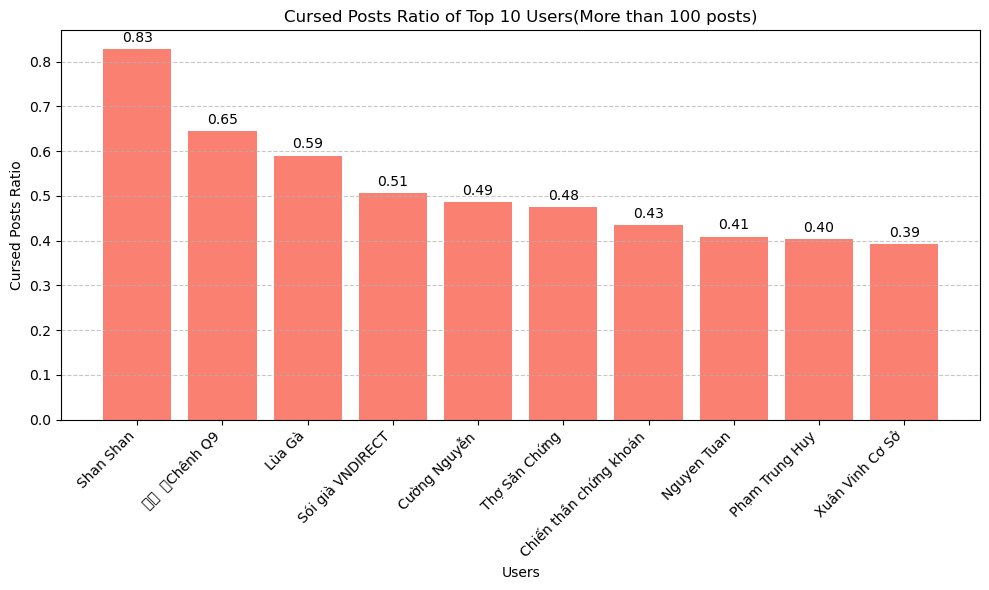

In [57]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_users_ratio['user_name'], top_users_ratio['cursed_posts_ratio'], color='salmon')
plt.xlabel('Users')
plt.ylabel('Cursed Posts Ratio')
plt.title('Cursed Posts Ratio of Top 10 Users(More than 100 posts)')
plt.xticks(rotation=45, ha='right')

# Add bar labels
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

bars = plt.bar(top_users_ratio['user_name'], top_users_ratio['cursed_posts_ratio'], color='salmon')
add_bar_labels(bars)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
user_replies_activity['cursed_posts_ratio'] = user_replies_activity['total_cursed_replies'] / user_replies_activity['total_replies']
user_replies_activity['cursed_posts_ratio'] = user_replies_activity['cursed_posts_ratio'].fillna(0)

top_repliers = user_replies_activity[user_replies_activity['total_replies'] >= 100]

top_repliers_ratio = top_repliers.sort_values('cursed_posts_ratio', ascending=False).head(10)
top_repliers_ratio

userid          user_name  total_replies  \
4306  7f027f11-5122-4fdc-b136-07253c5a617e  HuyHoang(Big boy)            151   
2169  3f90e03e-fbf5-47e9-955d-faeb92bea3a1       B√°c N√¥ng D√¢n            106   
3632  6b946f8e-6687-4882-a583-f08fb494b184    Nhang Nh·ªì Nh·∫°ng            290   
2870  557ac2ff-814c-49a0-a453-78728ae68859  S√≤ng B·∫°c H·ª£p Ph√°p            142   
7608  e5633a7f-09a5-4a95-8ddc-1a7ee3e2984a    B·ªë C·ªßa Chim L·ª£n            116   
7119  d59210fb-4176-4780-b3b6-1a191e82f849  L√°i Ch√∫a. Hahaha.            106   
7144  d64c98b5-0ba7-4f55-885b-97ee082d1a64      „Ö§„Ö§  „Ö§Ch√™nh Q9            660   
4054  788e65f8-c534-4d90-84b4-17065408919c     Chim L·ª£n Ch√∫a             211   
3294  61fc82dd-a08e-42cf-ab56-8aeb24deff29    Captain America            101   
7607  e55df0d7-15ea-4054-8a1c-fc1ca35eecdb          Bien Sang            107   

      total_cursed_replies  cursed_posts_ratio  
4306                   117            0.774834  
2169                    79            0.745283  
3632                   206            0.710345  
2870                    89            0.626761  
7608                    71            0.612069  
7119                    63            0.594340  
7144                   390            0.590909  
4054                   117            0.554502  
3294                    53            0.524752  
7607                    56            0.523364

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\704905710.py:23: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


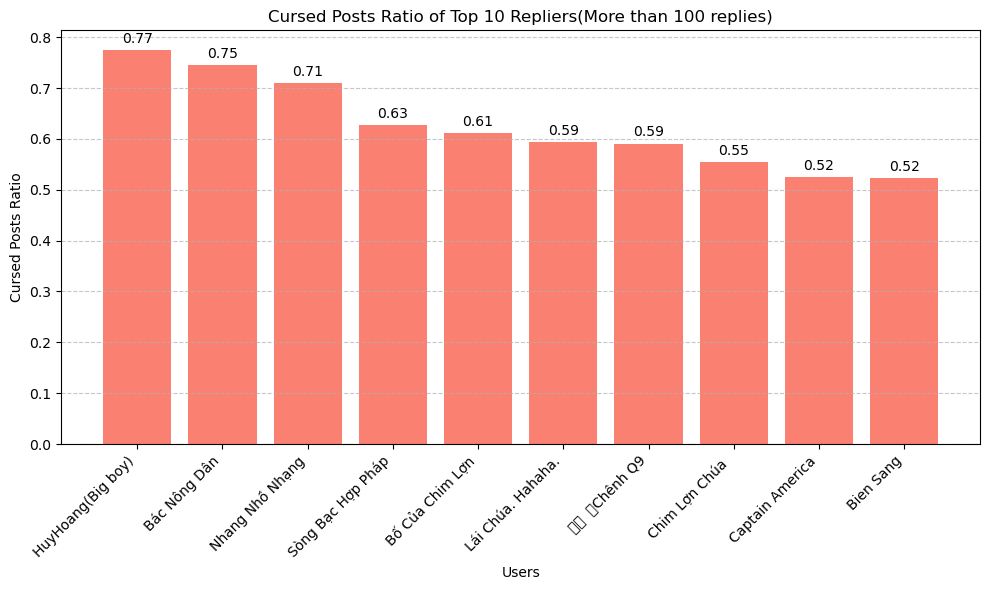

In [59]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_repliers_ratio['user_name'], top_repliers_ratio['cursed_posts_ratio'], color='salmon')
plt.xlabel('Users')
plt.ylabel('Cursed Posts Ratio')
plt.title('Cursed Posts Ratio of Top 10 Repliers(More than 100 replies)')
plt.xticks(rotation=45, ha='right')

# Add bar labels
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

bars = plt.bar(top_repliers_ratio['user_name'], top_repliers_ratio['cursed_posts_ratio'], color='salmon')
add_bar_labels(bars)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:
Q9_df = posts_df[posts_df['userid'] == 'd64c98b5-0ba7-4f55-885b-97ee082d1a64']
Q9_df.head(2)

postID                                    originalContent  \
122  29103683  Khi m√†y c·ªù b·∫°c thua l·ªó ·ªü Crypto\n\nM√†y ch·ªâ 1 c...   
137  29103614  Tao tuy√™n b·ªë:\n\nDonald Trump l√† c∆° h·ªôi t·ªët ƒë·ªÉ...   

                              date link  sentiment  totalLikes  totalReplies  \
122  2024-11-06T21:23:02.987+07:00  NaN         -1           0             4   
137   2024-11-06T21:18:06.83+07:00  NaN         -1           0             0   

     replyToPostID                                      taggedSymbols  \
122            NaN  [{'symb': '$BTC', 'price': 74125.24}, {'symb':...   
137            NaN  [{'symb': '$BTC', 'price': 73840.23}, {'symb':...   

             username                                userid  totalImages  \
122     „Ö§„Ö§  „Ö§Ch√™nh Q9  d64c98b5-0ba7-4f55-885b-97ee082d1a64            0   
137     „Ö§„Ö§  „Ö§Ch√™nh Q9  d64c98b5-0ba7-4f55-885b-97ee082d1a64            0   

     totalSymbols  
122             8  
137             8

In [69]:
Q9_df['totalReplies'].sum()
q9_postid_list = Q9_df['postID'].tolist()
q9_replies =  replies_df[replies_df['replyToPostID'].isin(q9_postid_list)]


In [70]:
q9_replies['total_curse_words'] = q9_replies['originalContent'].apply(count_cursed_words)
q9_replies

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\2809133932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q9_replies['total_curse_words'] = q9_replies['originalContent'].apply(count_cursed_words)


postID                                    originalContent  \
632    29081001                                 B·ªë nh√† c√°c anh :))   
633    29080966                               ƒë√™m r ng≈© th√¥i ch√∫ üòÜ   
634    29080965  ch√∫ l·ª´a ƒëc a th√¨ gi·ªù ch√∫ ƒë√£ ƒëc l√†m ch√¢n b·∫£o dz...   
635    29080963                             sao ch√∫ bi·∫øt. ƒê√∫ng r·ªìi   
636    29080962     c√≥ ph·∫£i h·ªçp t·ª´ 9h15 ko ü§£\n9h ch√∫ ƒë·∫øn cbi nh√© üòù   
...         ...                                                ...   
55381  28744755  Danh m·ª•c c·ªßa tao ƒë√¢y. M√†y c√≥ gi·ªèi th√¨ ƒë·∫°p h·ªô t...   
55382  28744720                    ƒë'·ªách con m·∫π e, a ch∆°i c·∫£ ng√†y    
55383  28744719              kh√° ƒë·∫•y. Ch∆°i c·∫£ ƒë√™m gi·ªù v·∫´n ch∆∞a ng·ªß   
55384  28744717                             ch∆°i con m·∫π m√†iiii e √†   
55385  28744715                                 Ch∆°i g√¨ ngon th·∫ø '   

                                date link  sentiment  isTop  isExpertIdea  \
632     2024-11-06T01:42:02.88+07:00  NaN          0  False         False   
633    2024-11-06T01:04:24.963+07:00  NaN          0  False         False   
634    2024-11-06T01:03:56.383+07:00  NaN          0  False         False   
635    2024-11-06T01:02:49.907+07:00  NaN          0  False         False   
636    2024-11-06T01:02:14.617+07:00  NaN          0  False         False   
...                              ...  ...        ...    ...           ...   
55381  2024-10-18T05:28:07.053+07:00  NaN          0  False         False   
55382   2024-10-18T04:37:05.27+07:00  NaN          0  False         False   
55383  2024-10-18T04:35:52.257+07:00  NaN          0  False         False   
55384  2024-10-18T04:26:59.257+07:00  NaN          0  False         False   
55385  2024-10-18T04:24:21.593+07:00  NaN          0  False         False   

       totalLikes  totalReplies  replyToPostID  referToPostID taggedSymbols  \
632             0             0       29080801            NaN            []   
633             0             0       29080801            NaN            []   
634             0             0       29080801            NaN            []   
635             1             0       29080801            NaN            []   
636             0             0       29080801            NaN            []   
...           ...           ...            ...            ...           ...   
55381           0             0       28744687            NaN            []   
55382           0             0       28744687            NaN            []   
55383           0             0       28744687            NaN            []   
55384           0             0       28744687            NaN            []   
55385           0             0       28744687            NaN            []   

                          username                                userid  \
632                            Ems  c633616c-98f7-4e80-b0be-c705e8e7dd53   
633                  „Ö§„Ö§  „Ö§Ch√™nh Q9  d64c98b5-0ba7-4f55-885b-97ee082d1a64   
634                  „Ö§„Ö§  „Ö§Ch√™nh Q9  d64c98b5-0ba7-4f55-885b-97ee082d1a64   
635    C√°c Ch√∫ C√≤n Non V√† Xanh L·∫Øm  04bdbc76-5782-4a29-9110-98b3927d3740   
636                  „Ö§„Ö§  „Ö§Ch√™nh Q9  d64c98b5-0ba7-4f55-885b-97ee082d1a64   
...                            ...                                   ...   
55381            ƒê·ªôc B∆∞·ªõc Tr√™n S√†n  6ba9b1c3-da36-49d6-92f0-c3c58bd0a7b1   
55382                „Ö§„Ö§  „Ö§Ch√™nh Q9  d64c98b5-0ba7-4f55-885b-97ee082d1a64   
55383            Nguy·ªÖn Minh Quang  f4bd093c-ad7d-4037-817e-72ddfdf7eff3   
55384                „Ö§„Ö§  „Ö§Ch√™nh Q9  d64c98b5-0ba7-4f55-885b-97ee082d1a64   
55385            Nguy·ªÖn Minh Quang  f4bd093c-ad7d-4037-817e-72ddfdf7eff3   

       totalImages  totalSymbols  total_curse_words  
632              0             0                  0  
633              0             0                  0  
634              0             0                  0  
635       

In [71]:
q9_replies['has_cursed_words'] = q9_replies['total_curse_words'] > 0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\1093875776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q9_replies['has_cursed_words'] = q9_replies['total_curse_words'] > 0


In [73]:
total_number_of_replies = len(q9_replies)   
total_cursed_words_posts_q9 = q9_replies['has_cursed_words'].sum()

print(f'Total number of replies: {total_number_of_replies}')
print(f'Total number of replies containing cursed words: {total_cursed_words_posts_q9}')


Total number of replies: 367
Total number of replies containing cursed words: 148
